In [2]:
## Data Preprocessing
# In this step, we split the original dataset (crop_yield_dataset.csv) 
# into two separate datasets:
#   1) crop_weather_data.csv  → weather-related attributes
#   2) crop_soiltype_data.csv → soil-related attributes
# This helps organize features and makes analysis/modeling easier.

In [3]:
# Import necessary libraries for data analysis and visualization
# pandas: Data manipulation and analysis library with DataFrame and Series structures
# numpy: Core library for numerical computing, arrays, and mathematical functions
# matplotlib.pyplot: Library for creating static, animated, and interactive plots
# seaborn: High-level interface for attractive statistical data visualization
# scipy.stats: Module for probability distributions and statistical functions/tests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# read cvs file
# df = pd.read_csv('C:\\Lincolnuni\\COMP_647\\project_1\\comp647\\dataset\\raw\\crop_yield_dataset.csv')
df = pd.read_csv('../dataset/raw/crop_yield_dataset.csv')

# Display the first 5 rows
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
# Returns the number of rows and columns in the DataFrame.
df.shape

(36520, 12)

In [5]:
# Returns information about the DataFarme, including data tyes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [6]:
# Returns summary statistics for numberical columns in the DataFrame.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Soil_pH,36520.0,6.602731,0.816973,5.500000,6.250000,6.500000,6.750000,8.000000
Temperature,36520.0,23.813996,8.920519,-3.540176,17.168542,22.902987,30.254748,54.148911
Humidity,36520.0,74.256624,6.767587,45.851089,69.745252,77.097013,80.000000,80.000000
Wind_Speed,36520.0,10.020153,2.998310,-3.388906,7.985872,10.000299,12.038546,22.606078
N,36520.0,66.011035,10.886721,45.000000,58.500000,65.000000,71.500000,91.000000
P,36520.0,53.014006,8.812884,36.000000,45.000000,54.000000,60.000000,72.000000
K,36520.0,42.018250,8.537810,27.000000,35.000000,42.000000,49.500000,60.000000
Crop_Yield,36520.0,26.878480,25.740936,0.000000,0.000000,23.366344,46.415729,136.711982
Soil_Quality,36520.0,37.516632,17.703171,13.291667,22.500000,35.583333,49.291667,74.333333


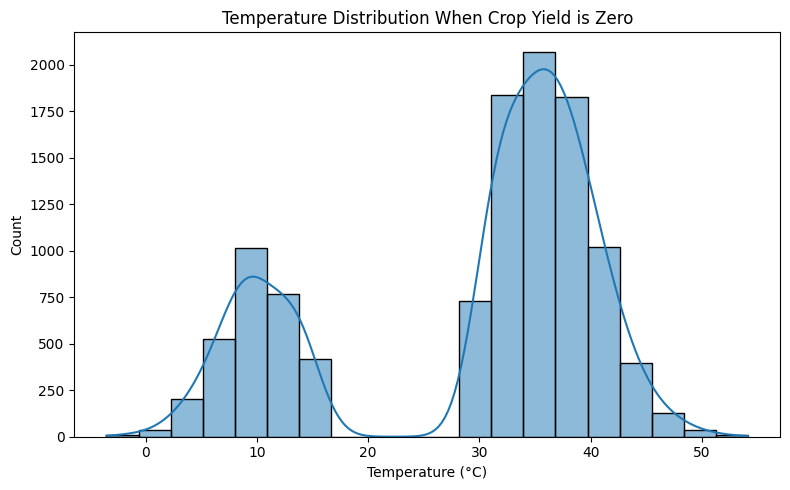

In [7]:
# Filter rows where Crop_Yield is 0
zero_yield = df[df['Crop_Yield'] == 0]

plt.figure(figsize=(8, 5))
sns.histplot(zero_yield['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution When Crop Yield is Zero")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

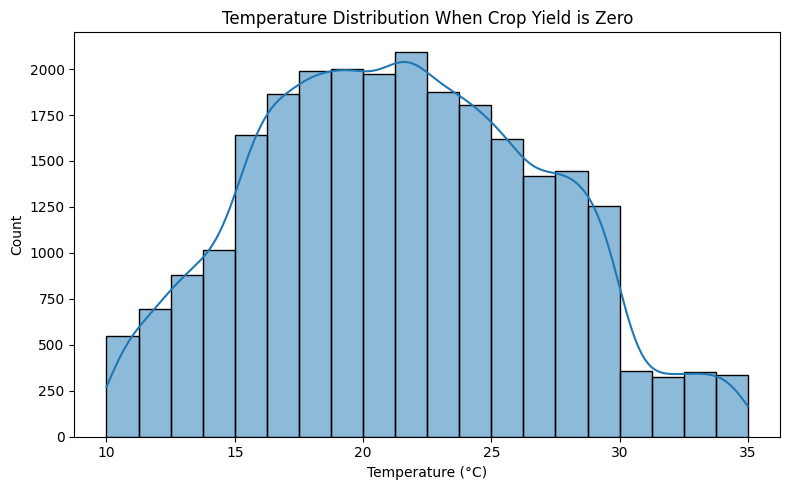

In [8]:
# Filter rows where Crop_Yield is 0
zero_yield = df[df['Crop_Yield'] != 0]

plt.figure(figsize=(8, 5))
sns.histplot(zero_yield['Temperature'], bins=20, kde=True)
plt.title("Temperature Distribution When Crop Yield is Zero")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [9]:
# Extract only weather-related columns (e.g., Temperature, Humidity, Wind Speed)
# Here we select a subset of columns from the original dataset that are directly 
# related to weather conditions and crop yield:
#   - Date: to keep track of the time dimension
#   - Crop_Type: to associate weather data with each crop
#   - Temperature, Humidity, Wind_Speed: key weather attributes influencing growth
#   - Crop_Yield: included to allow direct correlation with weather factors
# Using .copy() creates a new independent DataFrame to avoid altering the original one.

weather_columns = ['Date', 'Crop_Type','Temperature', 'Humidity', 'Wind_Speed','Crop_Yield']
df_weather = df[weather_columns].copy()

In [10]:
# Display the first 5 rows
df_weather.head()

,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield
0,2014-01-01,Wheat,9.440599,80.000000,10.956707,0.000000
1,2014-01-01,Corn,20.052576,79.947424,8.591577,104.871310
2,2014-01-01,Rice,12.143099,80.000000,7.227751,0.000000
3,2014-01-01,Barley,19.751848,80.000000,2.682683,58.939796
4,2014-01-01,Soybean,16.110395,80.000000,7.696070,32.970413


In [11]:
# Convert 'Date' column to datetime format
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [12]:
# Extract year, month, and day into separate columns
# The 'Date' column is stored as a datetime object.
# By splitting it into Year, Month, and Day, we can perform
# time-based analysis (e.g., seasonal trends, monthly averages, yearly comparisons).
# This also makes it easier to group or filter the dataset by specific periods.

df_weather['Year'] = df_weather['Date'].dt.year
df_weather['Month'] = df_weather['Date'].dt.month
df_weather['Day'] = df_weather['Date'].dt.day
print(df_weather)

            Date  Crop_Type  Temperature   Humidity  Wind_Speed  Crop_Yield  \
0     2014-01-01      Wheat     9.440599  80.000000   10.956707    0.000000   
1     2014-01-01       Corn    20.052576  79.947424    8.591577  104.871310   
2     2014-01-01       Rice    12.143099  80.000000    7.227751    0.000000   
3     2014-01-01     Barley    19.751848  80.000000    2.682683   58.939796   
4     2014-01-01    Soybean    16.110395  80.000000    7.696070   32.970413   
...          ...        ...          ...        ...         ...         ...   
36515 2023-12-31     Cotton    19.538555  80.000000    3.666664   73.323885   
36516 2023-12-31  Sugarcane    21.068336  78.931664    8.795036   39.226521   
36517 2023-12-31     Tomato     6.030148  80.000000    9.409497    0.000000   
36518 2023-12-31     Potato    11.079561  80.000000   10.969366    6.067881   
36519 2023-12-31  Sunflower    11.455692  80.000000    5.394758   11.825986   

       Year  Month  Day  
0      2014      1    1  

In [13]:
# Round the Temperature values to the nearest integer and convert them to int type
# This step helps simplify continuous temperature values by reducing decimal precision.
# Having integer temperature values is useful for:
#   - Grouping data (e.g., average yield at each integer temperature)
#   - Plotting and visualization with cleaner x-axis labels
#   - Improving interpretability for non-technical users
df_weather['Temperature_int'] = df_weather['Temperature'].round().astype(int)

# Print the updated DataFrame to verify the new column
print(df_weather)

            Date  Crop_Type  Temperature   Humidity  Wind_Speed  Crop_Yield  \
0     2014-01-01      Wheat     9.440599  80.000000   10.956707    0.000000   
1     2014-01-01       Corn    20.052576  79.947424    8.591577  104.871310   
2     2014-01-01       Rice    12.143099  80.000000    7.227751    0.000000   
3     2014-01-01     Barley    19.751848  80.000000    2.682683   58.939796   
4     2014-01-01    Soybean    16.110395  80.000000    7.696070   32.970413   
...          ...        ...          ...        ...         ...         ...   
36515 2023-12-31     Cotton    19.538555  80.000000    3.666664   73.323885   
36516 2023-12-31  Sugarcane    21.068336  78.931664    8.795036   39.226521   
36517 2023-12-31     Tomato     6.030148  80.000000    9.409497    0.000000   
36518 2023-12-31     Potato    11.079561  80.000000   10.969366    6.067881   
36519 2023-12-31  Sunflower    11.455692  80.000000    5.394758   11.825986   

       Year  Month  Day  Temperature_int  
0      2

In [14]:
# Save weather data to a new CSV
df_weather.to_csv('../dataset/processed/crop_weather_data_0.csv', index=False)
print("Weather data saved")
display(df_weather.head())

Weather data saved


,Date,Crop_Type,Temperature,Humidity,Wind_Speed,Crop_Yield,Year,Month,Day,Temperature_int
0,2014-01-01,Wheat,9.440599,80.000000,10.956707,0.000000,2014,1,1,9
1,2014-01-01,Corn,20.052576,79.947424,8.591577,104.871310,2014,1,1,20
2,2014-01-01,Rice,12.143099,80.000000,7.227751,0.000000,2014,1,1,12
3,2014-01-01,Barley,19.751848,80.000000,2.682683,58.939796,2014,1,1,20
4,2014-01-01,Soybean,16.110395,80.000000,7.696070,32.970413,2014,1,1,16


In [15]:
# Generate descriptive statistics for all columns and transpose for better readability
df_weather.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,36520,2018-12-31 12:00:00,2014-01-01 00:00:00,2016-07-01 18:00:00,2018-12-31 12:00:00,2021-07-01 06:00:00,2023-12-31 00:00:00,NaN
Temperature,36520.0,23.813996,-3.540176,17.168542,22.902987,30.254748,54.148911,8.920519
Humidity,36520.0,74.256624,45.851089,69.745252,77.097013,80.0,80.0,6.767587
Wind_Speed,36520.0,10.020153,-3.388906,7.985872,10.000299,12.038546,22.606078,2.99831
Crop_Yield,36520.0,26.87848,0.0,0.0,23.366344,46.415729,136.711982,25.740936
Year,36520.0,2018.499726,2014.0,2016.0,2018.5,2021.0,2023.0,2.871939
Month,36520.0,6.523549,1.0,4.0,7.0,10.0,12.0,3.44858
Day,36520.0,15.72782,1.0,8.0,16.0,23.0,31.0,8.799445
Temperature_int,36520.0,23.811528,-4.0,17.0,23.0,30.0,54.0,8.926331


In [16]:
# Extract only soilType-related columns (e.g., Soil_pH, Soil_Quality)
# Here we select a subset of columns from the original dataset that describe soil characteristics:
#   - Date: to align soil data with time and crop yield
#   - Crop_Type: to identify which crop the soil data is associated with
#   - Soil_pH: acidity/alkalinity of the soil, critical for nutrient availability
#   - N, P, K: primary soil nutrients (Nitrogen, Phosphorus, Potassium) that directly affect crop growth
#   - Soil_Quality: an overall indicator or category of soil condition
#   - Crop_Yield: included to analyze the relationship between soil properties and yield
# Using .copy() ensures we create a new DataFrame so that modifications won’t affect the original dataset.

soiltype_columns = ['Date', 'Crop_Type','Soil_pH', 'N', 'P', 'K', 'Soil_Quality','Crop_Yield']
df_soiltype = df[soiltype_columns].copy()

In [17]:
# Display the first 5 rows
df_soiltype.head()

,Date,Crop_Type,Soil_pH,N,P,K,Soil_Quality,Crop_Yield
0,2014-01-01,Wheat,5.50,60.5,45.0,31.5,22.833333,0.000000
1,2014-01-01,Corn,6.50,84.0,66.0,50.0,66.666667,104.871310
2,2014-01-01,Rice,5.50,71.5,54.0,38.5,27.333333,0.000000
3,2014-01-01,Barley,6.75,50.0,40.0,30.0,35.000000,58.939796
4,2014-01-01,Soybean,5.50,49.5,45.0,38.5,22.166667,32.970413


In [18]:
# Convert 'Date' column to datetime format
df_soiltype['Date'] = pd.to_datetime(df_soiltype['Date'])

# Extract year, month, and day into separate columns
# The 'Date' column is stored as a datetime object.
# By splitting it into Year, Month, and Day, we can perform
# time-based analysis (e.g., seasonal trends, monthly averages, yearly comparisons).
# This also makes it easier to group or filter the dataset by specific periods.
df_soiltype['Year'] = df_soiltype['Date'].dt.year
df_soiltype['Month'] = df_soiltype['Date'].dt.month
df_soiltype['Day'] = df_soiltype['Date'].dt.day

print(df_soiltype)

            Date  Crop_Type  Soil_pH     N     P     K  Soil_Quality  \
0     2014-01-01      Wheat     5.50  60.5  45.0  31.5     22.833333   
1     2014-01-01       Corn     6.50  84.0  66.0  50.0     66.666667   
2     2014-01-01       Rice     5.50  71.5  54.0  38.5     27.333333   
3     2014-01-01     Barley     6.75  50.0  40.0  30.0     35.000000   
4     2014-01-01    Soybean     5.50  49.5  45.0  38.5     22.166667   
...          ...        ...      ...   ...   ...   ...           ...   
36515 2023-12-31     Cotton     6.25  66.0  55.0  48.0     49.291667   
36516 2023-12-31  Sugarcane     5.50  71.5  54.0  42.0     27.916667   
36517 2023-12-31     Tomato     6.75  50.0  36.0  30.0     33.833333   
36518 2023-12-31     Potato     5.50  60.5  45.0  31.5     22.833333   
36519 2023-12-31  Sunflower     6.25  60.0  55.0  44.0     46.375000   

       Crop_Yield  Year  Month  Day  
0        0.000000  2014      1    1  
1      104.871310  2014      1    1  
2        0.000000  20

In [19]:
# Save Soiltype data to a new CSV
df_soiltype.to_csv('../dataset/processed/crop_soiltype_data_0.csv', index=False)
print("Soiltype data saved")

# Display the first 5 rows
display(df_soiltype.head())

Soiltype data saved


,Date,Crop_Type,Soil_pH,N,P,K,Soil_Quality,Crop_Yield,Year,Month,Day
0,2014-01-01,Wheat,5.50,60.5,45.0,31.5,22.833333,0.000000,2014,1,1
1,2014-01-01,Corn,6.50,84.0,66.0,50.0,66.666667,104.871310,2014,1,1
2,2014-01-01,Rice,5.50,71.5,54.0,38.5,27.333333,0.000000,2014,1,1
3,2014-01-01,Barley,6.75,50.0,40.0,30.0,35.000000,58.939796,2014,1,1
4,2014-01-01,Soybean,5.50,49.5,45.0,38.5,22.166667,32.970413,2014,1,1
